# Trees and Forests
## 1/25/2024
### Kaylee Cho

In [1055]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Which firm goes out of business?

**1.1 Prepare**

In [1056]:
# 1.1.1 Prepare and load data
bank = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\tw-bankruptcy.csv", sep=",")
print(bank.shape)
bank.head(5)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [1057]:
# 1.1.2
bank.dtypes
# data are mostly float and there are a few int!
# there are no non-numeric variables

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [1058]:
# 1.1.3
bank.isna().sum()
# no missings exist

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [1059]:
# 1.1.4
# create a design matrix X and outcome vector y
columns_to_exclude = ["Bankrupt?"]
# Create the design matrix excluding specified columns
X = bank.drop(columns=columns_to_exclude).values
y = bank["Bankrupt?"].values

In [1060]:
# 1.1.5
# split your data into training and validation chunks
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
print("shape of original dataset :", bank.shape)
print("shape of input - training set", Xt.shape)
print("shape of input - testing set", Xv.shape)
print("shape of output - training set", yt.shape)
print("shape of output - testing set", yv.shape)

shape of original dataset : (6819, 96)
shape of input - training set (5455, 95)
shape of input - testing set (1364, 95)
shape of output - training set (5455,)
shape of output - testing set (1364,)


In [1061]:
# 1.1.6
# Create a Naive Model prediction (predict all as non-bankrupt - majority category)
yv_hat = [0] * len(yv)
# let's calculate accuracy
count = 0
for i in range(len(yv)):
    if yv[i] == yv_hat[i]:
        count += 1
naive_accuracy = count/len(yv)
print("Accuracy of the Naive Estimator:", naive_accuracy)

Accuracy of the Naive Estimator: 0.9728739002932552


**1.2 Logistic regression**

In [1062]:
# 1.2.1
from sklearn.linear_model import LogisticRegression

# Assuming X is your feature matrix and y is your target variable
model = LogisticRegression()
model.fit(X, y)

# Dimensionality of the feature space
dimensionality = len(model.coef_[0])
print("Dimensionality of the feature space:", dimensionality)

Dimensionality of the feature space: 95


**1.2.2** <br>
How does the logistic regression’s decision boundary look in the feature space? <br>
Since the dimensionality equals 95, which means that the decision boundary would be in a 95 dimensional space hyperplane we can't really imagine or plot it out for further interpretation. We might be able to plot it with very complex function, but interpreting would be almost meaningless in that dimensionality. 
<br> <br> Therefore, It would look like complex region distributed in a 95 dimensional hyperplane which is hard to imagine.

**1.2.3** <br>
What do you think given the values of the features, how much uncertainty is there if the firm
goes to bankruptcy or not? <br>
From the prediction above, we know that about 97% of the validation data tells us that the firm will not go bankrupt. Since the accuracy of the naive estimator is about 97% and high, we can say that there is little uncertainty in predicting if the firm goes bankrupt or not.

In [1063]:
# 1.2.4
from sklearn.linear_model import LogisticRegression
#fit the data
m_log = LogisticRegression()
_ = m_log.fit(Xt, yt)
# calculate accuracy
accuracy_validation = m_log.score(Xv, yv)
print("accuracy on validation data:", accuracy_validation)

accuracy on validation data: 0.966275659824047


In [1064]:
# 1.2.5
# naive estimator performs better with slightly higher accuracy.
accuracy_validation - naive_accuracy

-0.006598240469208205

**1.3 Decision trees**

**1.3.1**
In my opnion, since desicion trees start from the root node all the way to leaf node reducing dimensions, decision boundary  will fill up the hyperdimension feature space with box like features dividing it into multiple rectangular regions.

**1.3.2**
maximum depth parameter is what determines the maximum depth of the node that connects the root node to leaf nodes. The more higher the max depth is, the more complex the model is. Therefore, large max_depth can cause overfitting and small max_depth can cause underfitting.

In [1065]:
# 1.3.3
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 20, 2)
accuracy_train_list = []
accuracy_val_list = []
for i in max_depths:
    # create and fit the DecisionTreeClassifier model
    m = DecisionTreeClassifier(max_depth=i)
    _ = m.fit(Xt, yt)
    # predict y value on training dataset and find accuracy
    yt_hat = m.predict(Xt)
    accuracy_training = accuracy_score(yt, yt_hat)
    # predict y value on validation dataset and find accuracy 
    yv_hat = m.predict(Xv)
    accuracy_val = accuracy_score(yv, yv_hat)
    # print results
    print("max_depth:", i, "| accuracy training:", round(accuracy_training, 3), \
          "| accuracy validation:", round(accuracy_val, 3))
    # append the accuracy for training and validation on list
    accuracy_train_list.append(accuracy_training)
    accuracy_val_list.append(accuracy_val)

max_depth: 1 | accuracy training: 0.966 | accuracy validation: 0.973
max_depth: 3 | accuracy training: 0.971 | accuracy validation: 0.972
max_depth: 5 | accuracy training: 0.979 | accuracy validation: 0.968
max_depth: 7 | accuracy training: 0.989 | accuracy validation: 0.964
max_depth: 9 | accuracy training: 0.993 | accuracy validation: 0.963
max_depth: 11 | accuracy training: 0.996 | accuracy validation: 0.961
max_depth: 13 | accuracy training: 0.998 | accuracy validation: 0.961
max_depth: 15 | accuracy training: 1.0 | accuracy validation: 0.956
max_depth: 17 | accuracy training: 1.0 | accuracy validation: 0.956
max_depth: 19 | accuracy training: 1.0 | accuracy validation: 0.958


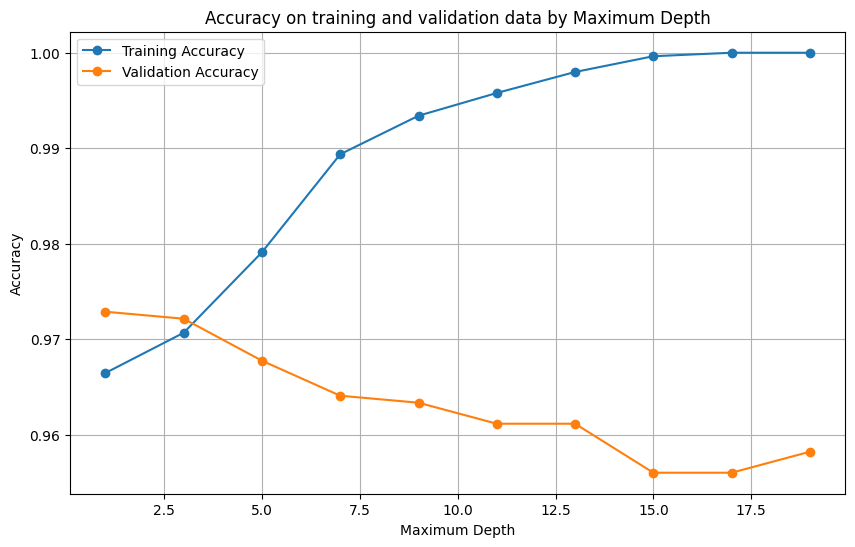

In [1066]:
# 1.3.4
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracy_train_list, label='Training Accuracy', marker='o')
plt.plot(max_depths, accuracy_val_list, label='Validation Accuracy', marker='o')

plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy on training and validation data by Maximum Depth')
plt.legend()
plt.grid(True)
plt.show()

**1.3.5**
The best validation accuracy is when the differnece between training accuracy and validation accuracy is the smallest and when the accuracy itself is at the highest. In this case, it would be when max_depth = 3.

**1.3.6**
The model starts to overfit after max_depth 3 since in region where max_depth is larger than 3 training accuracy increasing wheras validation accuracy starts to decrease. This means that the model is detecting noise on specific training dataset and overfitting. Therefore optimal depth will be max_depth where validation accuracy reaches the highest point which is max_depth = 3. Trees work better than logistic regression since it has higher accuracy rate.

### 2. Skin Color

In [1067]:
# 2.1.1
# load dataset
skin = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\skin-nonskin.csv", sep = "\t")
print(skin.shape)
skin.head(5)
# R, G, B => colors
# label for skin = 1, non-skin tone = 2

(245057, 4)


,B,G,R,Label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [1068]:
# 2.1.1
skin.isna().sum()
# no missings exist

B        0
G        0
R        0
Label    0
dtype: int64

In [1069]:
# 2.1.1
skin.dtypes
# all int type data

B        int64
G        int64
R        int64
Label    int64
dtype: object

**2.1.2**<br>
(a) dimensionality of the feature space is 3 dimensional space when excluding Label output column.<br>
(b) It would be a 3d dimension where feasibility depends on values of all three color input variable B, G, and R. <br>

**2.1.2 - (C)** <br>
I am not sure what exact method they used to determine Label variable in the dataset. However, thinking of a situation where observation is made by human or computer to detect the color of a skin, there could be uncertainty such as the lighting near where the observation was held could have effected the results. For instance, let's say a person observed this in a very bright/dark place where there could be possible errors in the Label column. Or if computer detected it there could also be computational error too.

In [1070]:
# 2.1.3
X = skin.drop(columns="Label").values
y = skin["Label"].values

In [1071]:
# 2.1.4
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
print("shape of original dataset :", skin.shape)
print("shape of input - training set", Xt.shape)
print("shape of input - testing set", Xv.shape)
print("shape of output - training set", yt.shape)
print("shape of output - testing set", yv.shape)

shape of original dataset : (245057, 4)
shape of input - training set (196045, 3)
shape of input - testing set (49012, 3)
shape of output - training set (196045,)
shape of output - testing set (49012,)


In [1072]:
# 2.1.5
# accuracy of the naive estimator that predicts every case to the majority category on valudation data
naive_yv_hat = [1] * len(yv)
# let's calculate accuracy
count = 0
for i in range(len(yv)):
    if yv[i] == naive_yv_hat[i]:
        count += 1
acc_naive = count/len(yv)
print("Accuracy of the Naive Estimator:", acc_naive)
# accuracy is indeed low! indicates that 1 in yv is about 20% of the values in yv

Accuracy of the Naive Estimator: 0.211397208846813


**2.2 Logistic Regression**

In [1073]:
# 2.2.1
m_log = LogisticRegression()
_ = m_log.fit(X, y)
# compute accuracy on validation data
accuracy_validation = m_log.score(Xv, yv)
print("Accuracy of the logistic regression:", accuracy_validation)

Accuracy of the logistic regression: 0.916061372725047


**2.2.2** <br>
log regression model performs way more better than the naive model. Accuracy on validation data is much higher in logistic regression. It's about 70% more accurate/higher.

**2.2.3** <br>
Q. How will the decision boundary look like in this 3d feature space? <br>
Since logistic regression model is fitting on 3 dimensional feature space, it will create decision boundaries in 3D space and we can imagine retengular shaped "box" like features divinding the space into multiple parts.

**2.3 Decision Trees: Maximum Depth**

**2.3.1**
The feature space for this is 3 containing R, G, and B. Since there are only three inputs the tree will look very simple with min_sample_split of two (from root node to lead node, there is only two pointers). I will attach a drawing too! The decision boundary will divide the feature space into two large sections.

In [1074]:
# 2.3.2
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 40, 5)
training_accuracy = []
validation_accuracy = []
for i in max_depth:
    m = DecisionTreeClassifier(max_depth=i)
    _ = m.fit(Xt, yt)
    
    yt_hat = m.predict(Xt)
    train_accuracy = accuracy_score(yt, yt_hat)

    yv_hat = m.predict(Xv)
    val_accuracy = accuracy_score(yv, yv_hat)

    print("max_depth:", i, "| accuracy training:", round(train_accuracy, 3), \
          "| accuracy validation:", round(val_accuracy, 3))
    
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

max_depth: 1 | accuracy training: 0.883 | accuracy validation: 0.881
max_depth: 6 | accuracy training: 0.99 | accuracy validation: 0.99
max_depth: 11 | accuracy training: 0.999 | accuracy validation: 0.998
max_depth: 16 | accuracy training: 1.0 | accuracy validation: 0.999
max_depth: 21 | accuracy training: 1.0 | accuracy validation: 0.999
max_depth: 26 | accuracy training: 1.0 | accuracy validation: 0.999
max_depth: 31 | accuracy training: 1.0 | accuracy validation: 0.999
max_depth: 36 | accuracy training: 1.0 | accuracy validation: 0.999


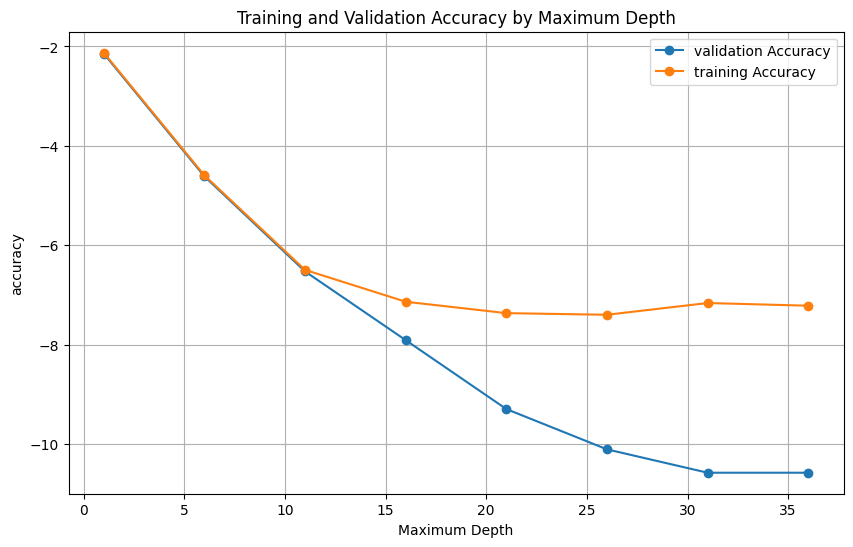

In [1087]:
# 2.3.3
plt.figure(figsize=(10, 6))
training_accuracy = np.array(training_accuracy)
validation_accuracy = np.array(validation_accuracy)
# reverse order bc we did log (1 - accuracy)
plt.plot(max_depth, np.log(1- training_accuracy), label='validation Accuracy', marker='o')
plt.plot(max_depth, np.log(1- validation_accuracy), label='training Accuracy', marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy by Maximum Depth')
plt.legend()
plt.grid(True)
plt.show()

**2.3.4**
The best validation accuracy I get is around -7.2 according to np.log(1-validation_accuracy) calculation and that shows that validation accuracy is 1-e^(-7.2) which is close to 99% from accurate calculation above. Corresponding max depth is 31.

**2.3.5**
The following model actually doesn't overfit since both training accuracy and validation accuracy tend to be constant around 27. Although training accuracy tends to be slightly higher than (postive accuracy rate) validation accuracy, they don't perform opposite slope trend as max_depth increases. The reason is because skin color data has less dimensions and is less noisy the decision tree seems to be able to capture relevant patterns without overfitting. The optimal max depth is 31 when both validation and training accuracy stays constant. We can say that the model is underfitting before max_depth = 10.

**2.3.6**
Bankruptcy data contained 95 variable features constructing 95 dimensional feature space. It has its peak at depth 5 or so since the data contains a lot of noise where the decision tree tends to capture when fitting the model which leads to overfitting easily. However, skin color data only contains 3 features constructing 3 dimensional feature space. This is much as less noise and a deeper decision tree might be able to capture relevant patterns without overfitting. This is why accuracy imporoves and stays constant from depth 30 or onward for both validation and training data.

### 3. Ensemble Estimator

**3.1 Prepare**

In [1076]:
# 3.1.1 Prepare and load data
bank = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\tw-bankruptcy.csv", sep=",")
# create a design matrix X and outcome vector y
columns_to_exclude = ["Bankrupt?"]
# Create the design matrix excluding specified columns
X = bank.drop(columns=columns_to_exclude).values
y = bank["Bankrupt?"].values
# split your data into training and validation chunks
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)

**3.2 Baseline models**

In [1077]:
# 3.2.1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# fit the logistic regression model
m_log = LogisticRegression()
_ = m_log.fit(Xt, yt)
# predict 
# compute accuracy on validation data
accuracy_validation = m_log.score(Xv, yv)
print("Accuracy of the logistic regression:", accuracy_validation)

Accuracy of the logistic regression: 0.9633431085043989


In [1078]:
# 3.2.2
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(10)
_ = m.fit(Xt, yt)
# predict yhat on validation data
yhat_val = m.predict(Xv)
# calculate accuracy on validation data
accuracy_val = np.mean(yv == yhat_val)
print("Accuracy of the KNeighborsClassifier:", accuracy_val)

Accuracy of the KNeighborsClassifier: 0.9706744868035191


In [1079]:
# 3.2.3
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth = 2)
_ = m.fit(Xt, yt)
accuracy = m.score(Xv, yv)
print("Accuracy of the DecisionTreeClassifier:", accuracy)

Accuracy of the DecisionTreeClassifier: 0.969208211143695


**3.3 Ensemble**

* should contain a fit method and score method...!
* fit function should take training data Xt and yt, Should fit all three baseline models, and return a tutple that contains these three models
* score function should take tuple of three models, validation matrix Xc and validation outcome yv as argument.
* score function should return:
1. for each model, predict outcome using Xv
2. for each case in validation data, pick majority value of the three predicted values. This is ensemble prediction
3. compute accuracy
4. return the average accuracy over the validation data

In [1080]:
# 3.3.1
def fit(Xt, yt):
    # fit LogisticRegression
    m_log = LogisticRegression()
    _ = m_log.fit(Xt, yt)
    # fit KNeighborsClassifier
    mk = KNeighborsClassifier(1)
    _ = mk.fit(Xt, yt)
    # fit DecisionTreeClassifier
    m_tree = DecisionTreeClassifier(max_depth = 2)
    _ = m_tree.fit(Xt, yt)
    return m_log, mk, m_tree
fit(Xt, yt)

(LogisticRegression(),
 KNeighborsClassifier(n_neighbors=1),
 DecisionTreeClassifier(max_depth=2))

In [1081]:
# 3.3.2
# this is bagging in ensemble methods!
m_log = fit(Xt, yt)[0]
mk = fit(Xt, yt)[1]
m_tree = fit(Xt, yt)[2]
yhat = ()
def score(m_log, mk, m_tree, Xv, yv):
    # predict outcome using Xv for each model
    log_yhat = m_log.predict(Xv)
    mk_yhat = mk.predict(Xv)
    tree_yhat = m_tree.predict(Xv)
    # create majority category that returns majority value of the three predicted values
    yhat = (log_yhat + mk_yhat + tree_yhat) > 1.5
    return yhat
score(m_log, mk, m_tree, Xv, yv)

array([False, False, False, ..., False, False, False])

**3.3.3**
If you think of matrices, yhat = yhat 1 + yhat 2 + yhat 3 gives us a matries constructed with majority variable in all three predictions. let's say majority here is going bankrupt. The following matrix yhat will have 1 if yhat1, yhat2, yhat3 has two or more 1 values. This is why we have 1.5 or even 2 for our "> 1.5" comparing number. It is to identify if 1(bankrupt) is majority or not. It is a good threshold since we have three variables, and 1.5 of 1s indicate two or more 1 in yhat.

In [1082]:
# 3.3.4
# calculating avg_accuracy with exsemble prediction (majority category)
yhat = score(m_log, mk, m_tree, Xv, yv)
avg_accuracy = np.mean(yhat == yv)
print("average accuracy of ensemble model:", avg_accuracy)

average accuracy of ensemble model: 0.9699413489736071


In [1083]:
# 3.3.5
def add_fit(Xt, yt):
    # fit KNeighborsClassifier
    mk_add = KNeighborsClassifier(10)
    _ = mk_add.fit(Xt, yt)
    # fit DecisionTreeClassifier
    m_tree_add = DecisionTreeClassifier(max_depth = 10)
    _ = m_tree_add.fit(Xt, yt)
    return mk_add, m_tree_add
add_fit(Xt, yt)

(KNeighborsClassifier(n_neighbors=10), DecisionTreeClassifier(max_depth=10))

**3.3.6**
ensemble estimators give better results than the individual ones. I believe adding more on the ensemble model should improve the results since there are more data to calculate the average accuracy.

**3.3.7** <br>
Ensemble estimator gives better results than individual ones since it calcualtes the average accuracy of multiple models with multiple hyperparameteres. The numerical accuracy results also shows that ensemble estimator has higher accuracy than individually calculated ones that are above. <br>
Adding more models did improve the average accuracy of the added ensemble model since it has higher accuracy rate. I believe it's because of the diversity of the model where I changed k and max_depth value on the added version.

In [1084]:
# 3.3.7
# calculate score adding on more estimators to your ensemble
mk_add = add_fit(Xt, yt)[0]
m_tree_add = add_fit(Xt, yt)[1]
yhat = ()
def score(m_log, mk, m_tree, Xv, yv, mk_add, m_tree_add):
    # predict outcome using Xv for each model
    log_yhat = m_log.predict(Xv)
    mk_yhat = mk.predict(Xv)
    tree_yhat = m_tree.predict(Xv)
    mk_add_yhat = mk_add.predict(Xv)
    m_tree_add_yhat = m_tree_add.predict(Xv)
    # create majority category that returns majority value of the three predicted values
    yhat = (log_yhat + mk_yhat + tree_yhat + mk_add_yhat + m_tree_add_yhat) > 2.5
    return yhat
yhat_added = score(m_log, mk, m_tree, Xv, yv, mk_add, m_tree_add)
avg_accuracy_added = np.mean(yhat_added == yv)
print("average accuracy with added ensemble model:", avg_accuracy_added)

average accuracy with added ensemble model: 0.9706744868035191
